# Predicting Car Prices

In this project, I will predict a car's market price using its attributes with a fundamental Machine Learning method, the k-nearest neighbors algorithm.

The dataset we will be working this contains information on various cars. For each car we have information about the technical aspects of the vehicle, such as mileage, the weight of the car, the miles per gallon (mpg), acceleration, and more.

Let start exploring the dataset

## Introducing the Dataset

In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 99

cars = pd.read_csv('imports-85.data')
cars.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


When reading in the dataset, we immediately notice the column headers do not match the ones in the dataset's documentation. When opening the dataset in a text editor, I found that the data file did not include the headers. Let's add the correct column headers before continuing to investigate the dataset.

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data',names = cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The columns that are numeric and non-ordinal that can be used as features for our model are

- normalized-losses
- wheel-base
- length
- width
- height
- curb-weight
- num-of-cylinders
- engine-size
- bore
- stroke
- compression rate
- horsepower
- peak-rpm
- city-mpg
- highway mpg

However, before we are able to use some of these columns, they must be cleaned and converted to numeric types.

Lets create a new dataset with only the columns with continuous columns listed above

In [3]:
continuous_cols = ['normalized-losses','wheel-base','length',
                  'width','height','curb-weight','engine-size',
                  'bore', 'stroke', 'compression-rate',
                  'horsepower', 'peak-rpm', 'city-mpg',
                  'highway-mpg', 'price']

numeric_cars = cars[continuous_cols]

We usually can't have any missing values if we want to use them for predictive modeling.

The normalized-losses column has question marks for some values. We will clean columns like these before fitting a knn model to our dataset.

## Cleaning the Dataset

Let's first clean up columns that have the value ? and replace it with NaN missing value. 

Because ? is a string value, columns containing this value were cast to the pandas object data type. After replacing ? values, we will need to convert columns containing this value to numeric types as well.

In [4]:
numeric_cars = numeric_cars.replace('?',np.nan)
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    object 
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    object 
 8   stroke             201 non-null    object 
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    object 
 11  peak-rpm           203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [5]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isna().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Because price is the value we are trying to predict, we cannot have any rows with missing price values. Lets drop these from our dataset

In [6]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isna().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [7]:
numeric_cars[numeric_cars['normalized-losses'].isna()]

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
14,NaN,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,9.0,121.0,4250.0,20.0,25.0,24565.0
15,NaN,103.5,189.0,66.9,55.7,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,30760.0
16,NaN,103.5,193.8,67.9,53.7,3380.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
17,NaN,110.0,197.0,70.9,56.3,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0
43,NaN,94.3,170.7,61.8,53.5,2337.0,111.0,3.31,3.23,8.5,78.0,4800.0,24.0,29.0,6785.0


Examining the rows where normalized-losses is missing, no other values for these entries have missing values. Because we only have 201 rows of data, removing the rows with missing values for normalized-losses would cause us to lose almost 20% of the dataset.

Given the limited data we have, let's keep the remaining null values and replace them with the mean value of their column.

In [8]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  201 non-null    float64
 1   wheel-base         201 non-null    float64
 2   length             201 non-null    float64
 3   width              201 non-null    float64
 4   height             201 non-null    float64
 5   curb-weight        201 non-null    float64
 6   engine-size        201 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   201 non-null    float64
 10  horsepower         201 non-null    float64
 11  peak-rpm           201 non-null    float64
 12  city-mpg           201 non-null    float64
 13  highway-mpg        201 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 25.1 KB


After cleaning the dataset, we are left with 201 rows of data, losing only 4 rows of data.

### Normalize the data

We will normalize each numeric column so that each value ranges from 0 to 1.

In [9]:
price = numeric_cars['price']

numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price

numeric_cars.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.298429,0.355598,0.494045,0.477697,0.497222,0.414145,0.248587,0.564793,0.565192,0.197767,0.258864,0.394934,0.338308,0.386489,13207.129353
std,0.167520,0.176862,0.183913,0.179613,0.203985,0.200658,0.156781,0.191480,0.150499,0.250310,0.174606,0.195148,0.178423,0.179346,7947.066342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.188482,0.230321,0.383582,0.324786,0.350000,0.264158,0.139623,0.435714,0.495238,0.100000,0.102804,0.265306,0.166667,0.236842,7775.000000
50%,0.298429,0.303207,0.479104,0.444444,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.219626,0.394934,0.305556,0.368421,10295.000000
75%,0.376963,0.460641,0.632836,0.538462,0.641667,0.557797,0.301887,0.742857,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


## Univariate k-nearest neighbors model

Lets first start with a simple univariate model before exploring a multi-variate model

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(parameter,target,df):
    #Initialize knn class
    knn = KNeighborsRegressor()
    
    #Randomize the dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataset 50/50 into test and train datasets
    
    middle = round(len(rand_df)/2)
    train = rand_df.iloc[0:middle]
    test = rand_df.iloc[middle:]
    
    #Fit the knn model on our dataset and make a prediction
    knn.fit(train[[parameter]],train[target])
    predictions = knn.predict(test[[parameter]])
    
    #Calculate the RMSE
    mse = mean_squared_error(test[target],predictions)
    rmse = np.sqrt(mse)
    
    return rmse

training_cols = numeric_cars.columns[:-1].to_list()

univariate_results = {}
for col in training_cols:
    univariate_results[col] = knn_train_test(col,'price',numeric_cars)

univariate_results = pd.DataFrame.from_dict(univariate_results,orient='index',columns=['RMSE'])
univariate_results = univariate_results.sort_values('RMSE')
univariate_results

,RMSE
engine-size,3238.462830
horsepower,4037.037713
curb-weight,4401.118255
highway-mpg,4630.026799
width,4704.482590
city-mpg,4766.422505
length,5427.200961
wheel-base,5461.553998
compression-rate,6610.812153
bore,6780.627785


Our univariate model shows that engine-size performed the best when used to predict car prices using the default k value of 5.

Lets begin to optimize hyper parameters, such as k.

### Optimizing Hyperparameters for univariate model

Let's modify the knn_train_test function above to also accept a parameter for the k value.

In [11]:
def knn_train_test(parameter,target,df,k=5):
    #Initialize knn class
    knn = KNeighborsRegressor(n_neighbors = k)
    
    #Randomize the dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataset 50/50 into test and train datasets
    
    middle = round(len(rand_df)/2)
    train = rand_df.iloc[0:middle]
    test = rand_df.iloc[middle:]
    
    #Fit the knn model on our dataset and make a prediction
    knn.fit(train[[parameter]],train[target])
    predictions = knn.predict(test[[parameter]])
    
    #Calculate the RMSE
    mse = mean_squared_error(test[target],predictions)
    rmse = np.sqrt(mse)
    
    return rmse

k_values = [1,3,5,7,9]

univ_res_k_optimize = {}
for col in training_cols:
    univ_res_k_optimize[col] = []
    for k in k_values:
        rmse_k = knn_train_test(col,'price',numeric_cars,k)
        univ_res_k_optimize[col].append(rmse_k)

        
univariate_results_opt = pd.DataFrame.from_dict(univ_res_k_optimize,orient='index',columns = k_values)
univariate_results_opt

,1,3,5,7,9
normalized-losses,7846.750605,7500.569812,7330.197653,7756.421586,7688.096097
wheel-base,4493.734069,5120.161506,5461.553998,5448.107051,5738.405685
length,4628.455501,5129.835821,5427.200961,5313.427721,5383.054515
width,4559.257298,4606.413692,4704.482590,4571.485046,4652.914172
height,8904.046456,8277.609643,8144.441043,7679.598124,7811.036063
curb-weight,5264.290231,5022.318012,4401.118255,4330.608104,4632.044474
engine-size,3258.486106,2840.562806,3238.462830,3563.086774,3831.824415
bore,8602.588485,6984.239489,6780.627785,6878.097966,6866.808502
stroke,9116.495955,7338.684670,8006.529545,7803.937797,7735.554366
compression-rate,8087.205347,7375.063686,6610.812153,6732.801283,7024.485525


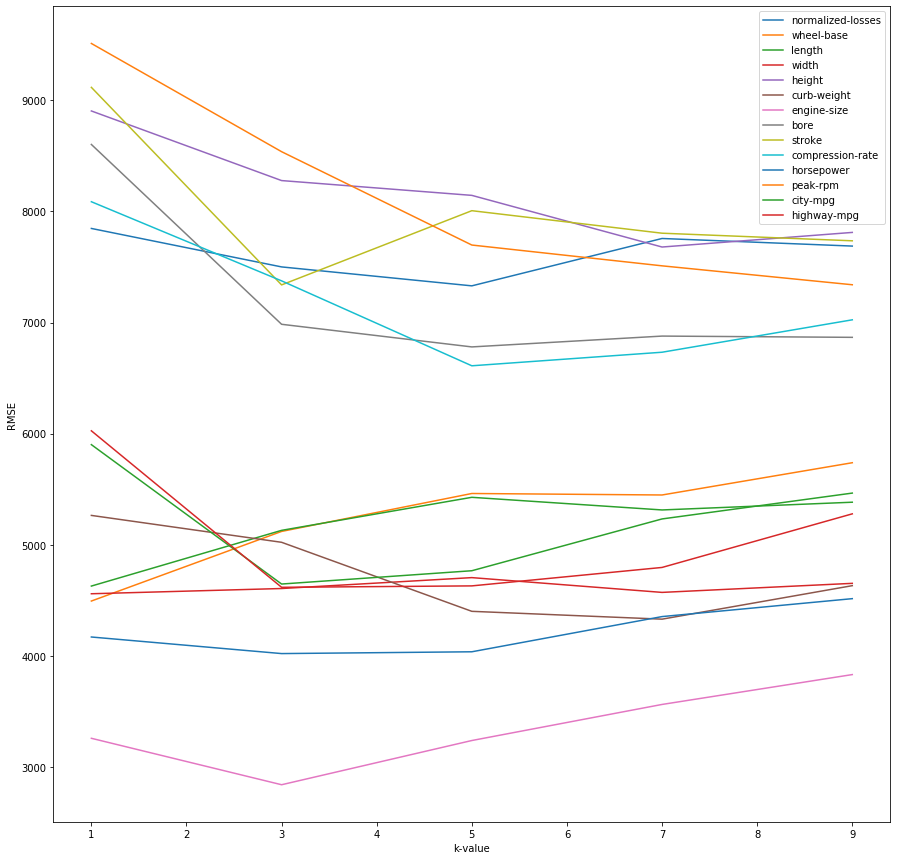

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

x = univariate_results_opt.columns.to_list()

fig = plt.figure(figsize = (15,15))
for col in training_cols:
    y = univariate_results_opt.loc[col].to_list()
    plt.plot(x,y,label=col)
    plt.ylabel('RMSE')
    plt.xlabel('k-value')
    plt.legend(loc = 'upper right')
plt.show()

When examing the RMSE values for each variable and various k-values, a k-value of 3 or 5 produces the lowest RMSE value for most variables. 

# Multivariate Model

Lets modify our knn_train_test function to work with multiple columns

First, lets take an average of the RMSE values for each column across all k-values to find which features are the best

In [13]:
feature_avg_rmse = {}

for i,rows in univariate_results_opt.iterrows():
    feature_avg_rmse[i] = rows.mean()

feature_avg_rmse = pd.DataFrame.from_dict(feature_avg_rmse,orient = 'index',columns=['RMSE']).sort_values('RMSE')
feature_avg_rmse

,RMSE
engine-size,3346.484586
horsepower,4219.377860
width,4618.910560
curb-weight,4730.075815
highway-mpg,5069.469256
length,5176.394904
city-mpg,5202.409003
wheel-base,5252.392462
compression-rate,7166.073599
bore,7222.472445


Our best 5 features are 
- engine-size
- horsepower
- width
- curb-weight
- highway-mpg

We will use these 5 features in our multivariate model

In [14]:
def knn_train_test(parameter,target,df,k=5):
    #Initialize knn class
    knn = KNeighborsRegressor(n_neighbors = k)
    
    #Randomize the dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataset 50/50 into test and train datasets
    
    middle = round(len(rand_df)/2)
    train = rand_df.iloc[0:middle]
    test = rand_df.iloc[middle:]
    
    #Fit the knn model on our dataset and make a prediction
    if type(parameter) == str:
        knn.fit(train[[parameter]],train[target])
        predictions = knn.predict(test[[parameter]])
    else:
        knn.fit(train[parameter],train[target])
        predictions = knn.predict(test[parameter])
    
    #Calculate the RMSE
    mse = mean_squared_error(test[target],predictions)
    rmse = np.sqrt(mse)
    
    return rmse

best_features = ['engine-size','horsepower','width','curb-weight','highway-mpg']

multivariate_results = {}
for i in range(1,len(best_features)):
    name = '{} best features'.format(i+1)
    features = best_features[:i+1]
    multivariate_results[name] = knn_train_test(features,'price',numeric_cars)
    
multivariate_results = pd.DataFrame.from_dict(multivariate_results,orient = 'index',columns=['RMSE (k=5)'])
multivariate_results

,RMSE (k=5)
2 best features,2949.881728
3 best features,3580.737665
4 best features,3487.340917
5 best features,3410.217013


In our multivariate model, the one that works the best includes the features engine-size and horsepower to best predict price using a k-value of 5.

Lets now optimize the models that performed the best.

## Hyperparameter Optimization

For the top 3 models in the last step, we will vary the hyperparameter value from 1 to 25 and visualize the resulting RMSE values

In [15]:
best_results = multivariate_results.sort_values('RMSE (k=5)')[:3].index.to_list()
best_results

['2 best features', '5 best features', '4 best features']

We will use the models with 2,5, and 4 features

In [16]:
k_values = [i for i in range(1,26)]
best_feature_combos = [best_features[:2],best_features,best_features[:-1]]

hyperparam_opt = {}

for i in range(len(best_results)):
    hyperparam_opt[best_results[i]] = []
    for k in k_values:
        hyperparam_opt[best_results[i]].append(knn_train_test(best_feature_combos[i],'price',numeric_cars,k))

hyperparam_opt = pd.DataFrame.from_dict(hyperparam_opt,orient='columns')
hyperparam_opt

,2 best features,5 best features,4 best features
0,2783.620424,2824.706123,2952.725687
1,2657.796381,2915.673165,3131.704953
2,2792.586573,3012.420455,3129.692822
3,2891.532969,3202.887605,3241.432078
4,2949.881728,3410.217013,3487.340917
5,3096.402602,3618.450943,3637.038147
6,3164.681969,3622.629021,3606.195078
7,3413.228359,3848.635836,3809.930703
8,3748.671660,3977.814914,3875.274902
9,4080.712506,3994.813221,3997.158306


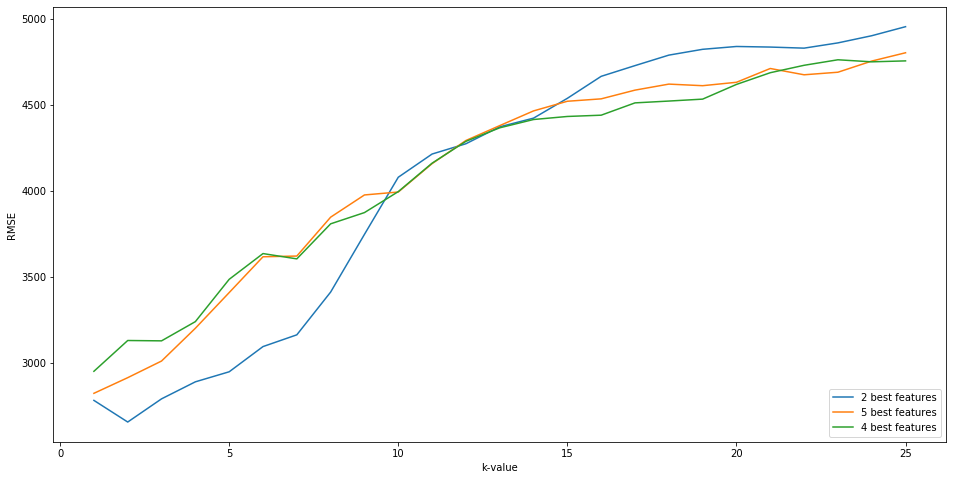

In [17]:
x = hyperparam_opt.index.to_list()
x = [i+1 for i in x]

fig = plt.figure(figsize = (16,8))
for combo in best_results:
    y = hyperparam_opt[combo].to_list()
    plt.plot(x,y,label=combo)
    plt.ylabel('RMSE')
    plt.xlabel('k-value')
    plt.legend(loc = 'lower right')
plt.show()

For the 4 and 5 feature models, a k-value of 1 produces the lower RMSE values. This is likely because there are not many cars who have very similar features for engine-size, horsepower, width, curb-weight, and highway-mpg (only for 5 feature model)

For a 2 feature model, a k-value of 2 produces the lowest RMSE value. This value is likely just slightly higher than the 4 or 5 feature models because there are cars who likely have similar engine-size and horsepower values to each other, but their width, curb-weight, and highway mpg could vary more.

## Conclusion

We examined a dataset of car prices with their features. We fit a k-nearest-neigbhors model on this dataset and optimized the model for the best features to use and hyperparameters.

We found that a model using engine-size and horsepower values and a k-value of 2 produces the least variability in price predictions. 

## Next Steps

Some next steps to improve this model would be to incorporate k-fold cross validation instead of test/train validation.

Additionally, it would be beneficial to modify the knn_train_test function to also perform the data cleaning that was required for this dataset.

### Incorporating data cleaning into the knn_train_test function

In [18]:
def knn_train_test(parameter,target,df,k=5):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    
    # Data clean
    df = df.replace('?',np.nan)  # CHANGE TO REGEX FOR ANY STRING VALUE
    df = df.astype('float')
    df = df.dropna(subset=[target])
    df = df.fillna(df.mean())
    
    tgt = df[target]
    df = (df - df.min())/(df.max() - df.min())
    df[target] = tgt
    
    #Initialize knn class
    knn = KNeighborsRegressor(n_neighbors = k)
    
    #Randomize the dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide the dataset 50/50 into test and train datasets
    
    middle = round(len(rand_df)/2)
    train = rand_df.iloc[0:middle]
    test = rand_df.iloc[middle:]
    
    #Fit the knn model on our dataset and make a prediction
    if type(parameter) == str:
        knn.fit(train[[parameter]],train[target])
        predictions = knn.predict(test[[parameter]])
    else:
        knn.fit(train[parameter],train[target])
        predictions = knn.predict(test[parameter])
    
    #Calculate the RMSE
    mse = mean_squared_error(test[target],predictions)
    rmse = np.sqrt(mse)
    
    return rmse


cleaning_test = knn_train_test(['engine-size','horsepower','highway-mpg'],'price',cars[continuous_cols],2)
cleaning_test

2928.705425661145

Incorporating the data cleaning into our function was successful, as we were able to successfully pass through our uncleaned dataset.

Let's now incorporate k-fold cross validation to our analysis.

## Incorporating k-fold Cross Validation

In [19]:
def knn_cross_validate(parameter,target,df,num_folds,k=5):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    
    # Data clean
    df = df.replace('?',np.nan)  # CHANGE TO REGEX FOR ANY STRING VALUE
    df = df.astype('float')
    df = df.dropna(subset=[target])
    df = df.fillna(df.mean())
    
    tgt = df[target]
    df = (df - df.min())/(df.max() - df.min())
    df[target] = tgt
    
    #Randomize the dataset
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #Create folds column to segment dataset into different folds
    #For k-folds cross validation
    
    num_rows = round(len(rand_df)/num_folds)
    folds = [i for i in range(1,num_folds+1)]
    
    rand_df.loc[rand_df.index[0:num_rows],'fold'] = 1
    for i in range(2,num_folds):
        rand_df.loc[rand_df.index[num_rows*(i-1):num_rows*i],'fold'] = i    
    rand_df.loc[rand_df.index[num_rows*(num_folds-1):],'fold'] = num_folds

    
    #Iterate through folds and fit the knn model on our dataset and make a prediction
    
    fold_rmses = []
    for fold in folds:
        
        test = rand_df[rand_df['fold'] == fold].copy()
        train = rand_df[rand_df['fold'] != fold].copy()
        
        #Initialize knn class
        knn = KNeighborsRegressor(n_neighbors = k)
        
        if type(parameter) == str:
            knn.fit(train[[parameter]],train[target])
            predictions = knn.predict(test[[parameter]])
        else:
            knn.fit(train[parameter],train[target])
            predictions = knn.predict(test[parameter])

        #Calculate the RMSE
        mse = mean_squared_error(test[target],predictions)
        rmse = np.sqrt(mse)
        
        fold_rmses.append(rmse)
    
    avg_rmse = np.mean(fold_rmses)
    std_rmse = np.std(fold_rmses)
    return (avg_rmse,std_rmse)

cross_valid_test_bias,cross_valid_test_var = knn_cross_validate(['engine-size','horsepower','highway-mpg'],'price',numeric_cars,10,2)
print('Bias: ', cross_valid_test_bias,'\nVariance: ',cross_valid_test_var)

Bias:  2747.1596077853596 
Variance:  637.7604748035416


Incorporating k-fold cross validation improved our results, with a reduction of almost 200 for our RMSE value from our model that did not incorporate k-fold cross validation. We can also measure variance with a cross validation. An optimal model will minimize bias and variance. Let's try to find the combination of folds and k that minimizes both values.

In [20]:
bias_matrix = np.zeros(shape=(4,4))
var_matrix = np.zeros(shape=(4,4))

for i in range(5,25,5):
    folds = i
    matrix_row = int(i/5 - 1)
    for k in range(2,6):
        matrix_col = int(k-2)
        bias,var = knn_cross_validate(['engine-size','horsepower','highway-mpg'],'price',numeric_cars,i,k)
        bias_matrix[matrix_row,matrix_col] = bias
        var_matrix[matrix_row,matrix_col] = var

def highlight_min(s): 
    is_min = s == s.min() 
    return ['background: lightgreen' if cell else '' for cell in is_min] 

bias_df = pd.DataFrame(bias_matrix,index = [5,10,15,20],columns = [2,3,4,5])
print('Bias')
display(bias_df.style.apply(highlight_min))

var_df = pd.DataFrame(var_matrix,index = [5,10,15,20],columns = [2,3,4,5])
print('Variance')
display(var_df.style.apply(highlight_min))

print('Bias+Variance')
bias_var_df = bias_df + var_df
display(bias_var_df.style.apply(highlight_min))

Bias


,2,3,4,5
5,3046.221296,2930.119470,2937.308060,2843.870775
10,2747.159608,2876.844468,2848.075086,2789.519240
15,2740.033186,2831.372168,2811.860334,2818.519219
20,2585.848669,2580.174701,2581.590569,2629.732341


Variance


,2,3,4,5
5,637.922389,501.130461,401.408995,160.451628
10,637.760475,702.433785,738.000016,493.470932
15,705.716797,843.584298,1002.399195,886.232593
20,1180.455686,1227.179928,1131.388396,1155.337811


Bias+Variance


,2,3,4,5
5,3684.143685,3431.249932,3338.717055,3004.322402
10,3384.920083,3579.278253,3586.075101,3282.990173
15,3445.749984,3674.956466,3814.259529,3704.751812
20,3766.304355,3807.354628,3712.978966,3785.070152


In the tables above, the k values are columns, and number of folds rows.

20 folds with a k value of 3 produces the least bias.
5 folds and a k value of 5 produces the least variance

When bias and variance are combined, the combination that minimizes both to their lowest combine value is 5 folds and a k value of 5. However, this value should be used with caution as these values have different units. 

Examining Variance, a k-value of 5 significantly reduces variance when folds are < 10. There is not a pattern with bias that indicates that bias improves as k increases, however, bias does improve as the number of folds increases, but not significantly until 20 folds are used. 

As a result, **I still recommend a hyperparameter combination of 5 folds and a k value of 5**